<a href="https://colab.research.google.com/github/edakilicaslan1/Energy-Efficiency-of-Buildings/blob/main/Energy_Efficiency_of_Buildings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("ENB2012_data.csv")

In [3]:
#Understanding the dataset

In [4]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.shape

(768, 10)

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
df.isnull().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

In [8]:
df.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [10]:
df.ndim

2

In [11]:
#Renaming the columns

In [12]:
df.rename({'X1': 'Relative Compactness', 'X2': 'Surface Area', 'X3':'Wall Area',
           'X4':'Roof Area','X5':'Overall Height','X6':'Orientation','X7':'Glazing Area',
           'X8':'Glazing Area Distribution','y1':'Heating Load','y2':'Cooling Load'}, axis=1, inplace=True)

In [13]:
df

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
...,...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48,16.61


In [14]:
#Visualization

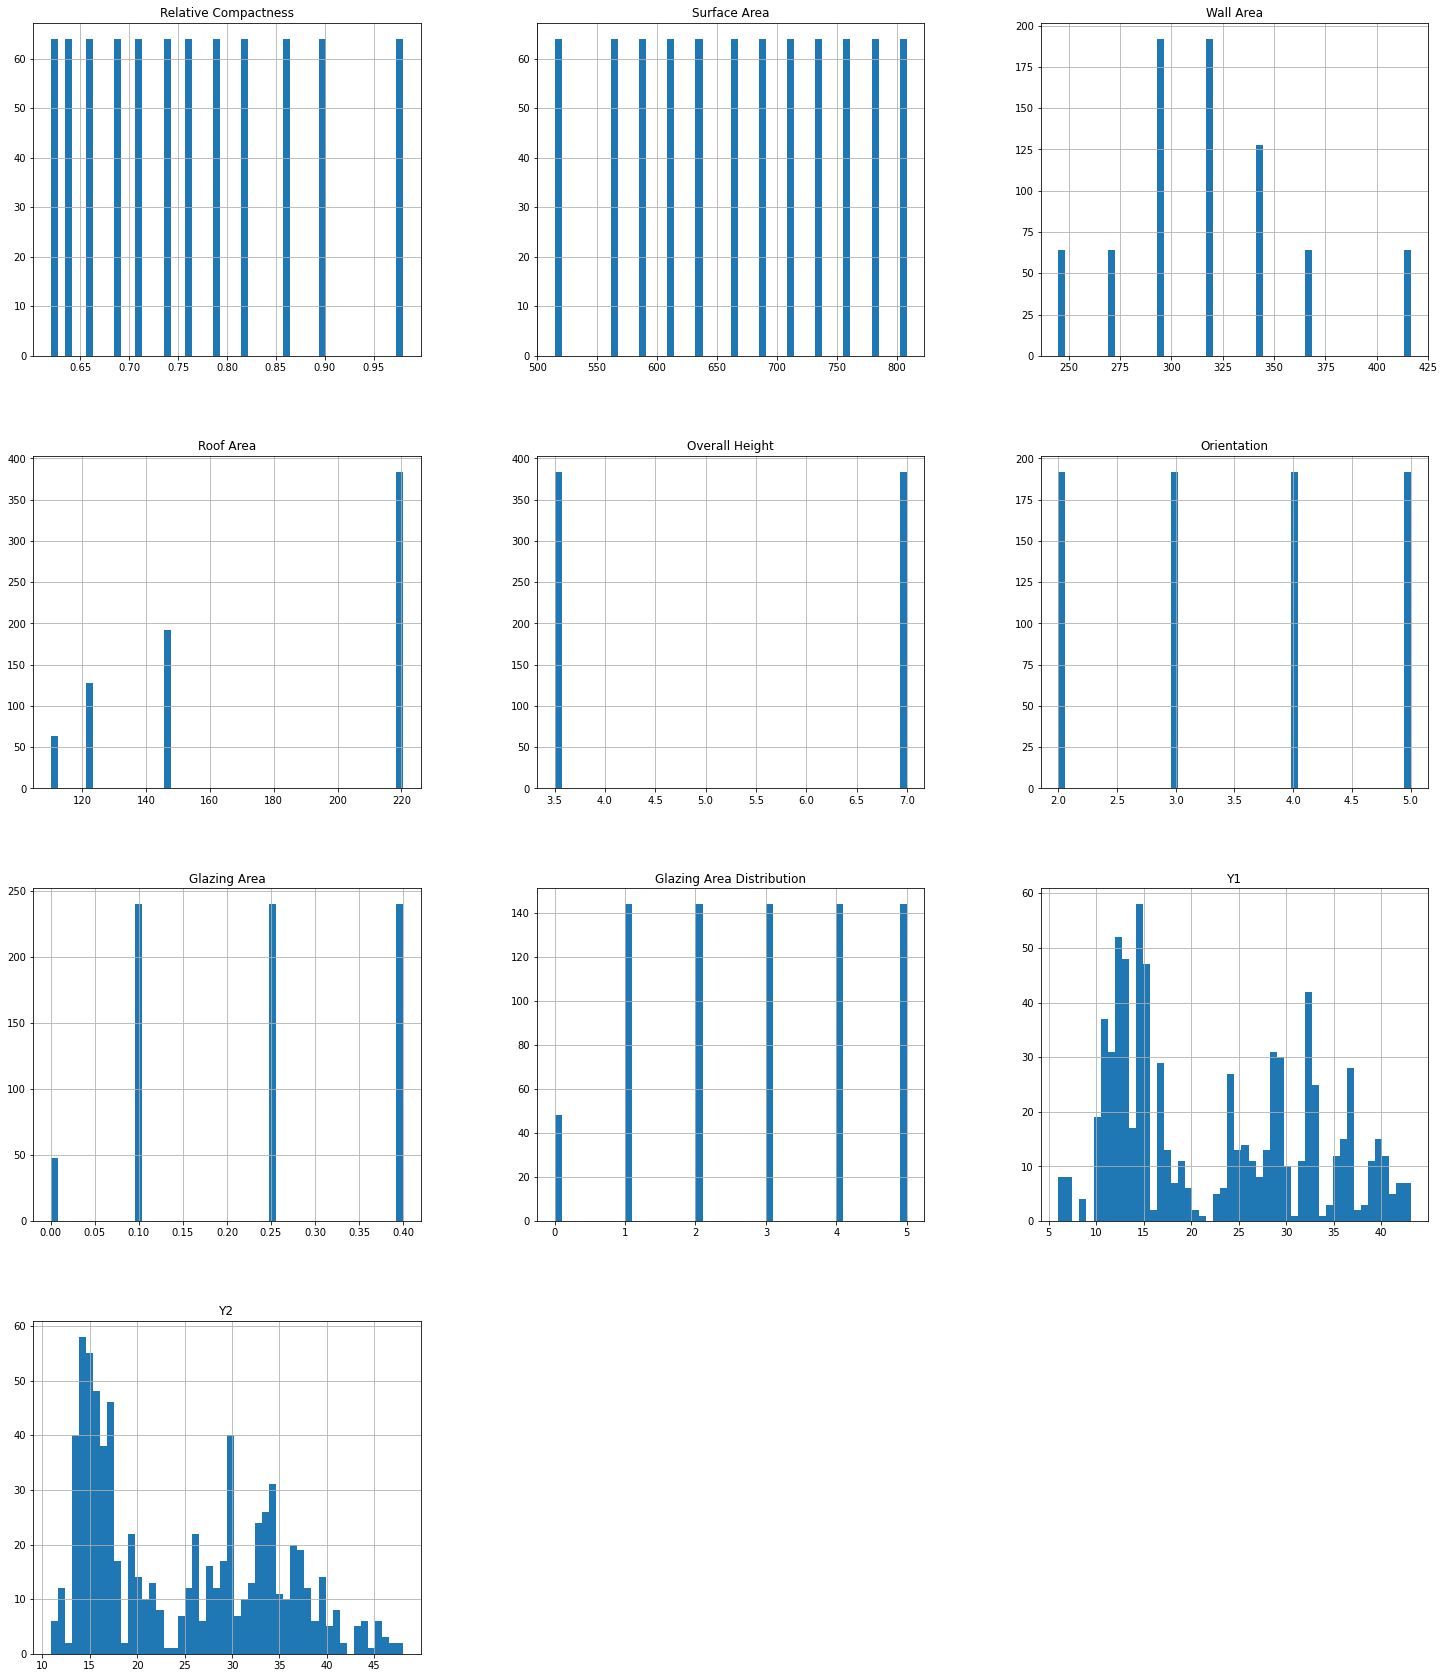

In [15]:
df.hist(figsize=(25, 30), bins=50, xlabelsize=10, ylabelsize=10)
plt.show()

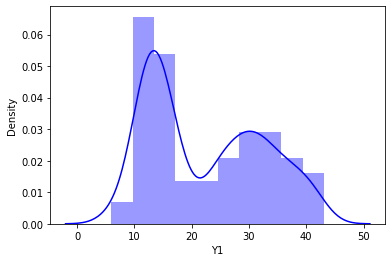

In [16]:
sns.distplot(df['Y1'], color = 'blue');

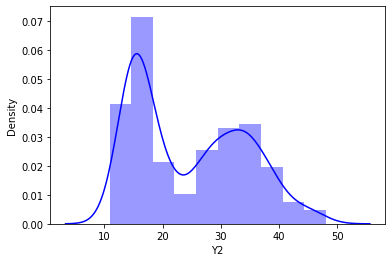

In [17]:
sns.distplot(df['Y2'], color = 'blue');

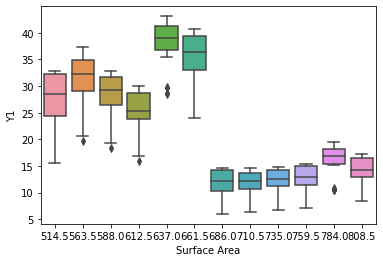

In [18]:
sns.boxplot(x="Surface Area",y="Y1",data=df);

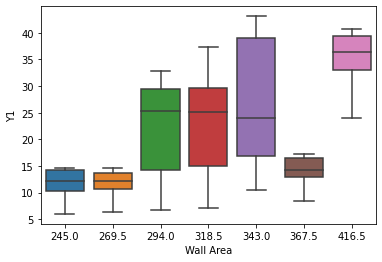

In [19]:
sns.boxplot(x="Wall Area",y="Y1",data=df);

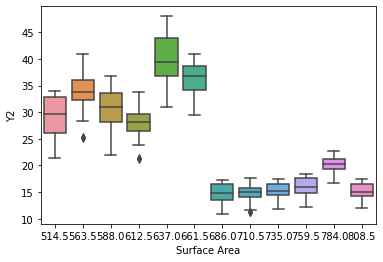

In [20]:
sns.boxplot(x="Surface Area",y="Y2",data=df);

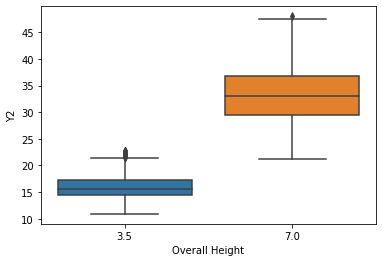

In [21]:
sns.boxplot(x="Overall Height",y="Y2",data=df);

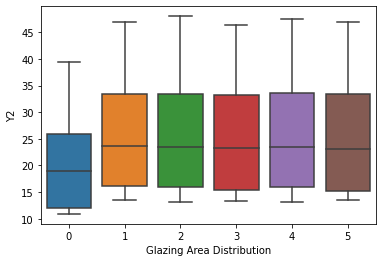

In [22]:
sns.boxplot(x="Glazing Area Distribution",y="Y2",data=df);

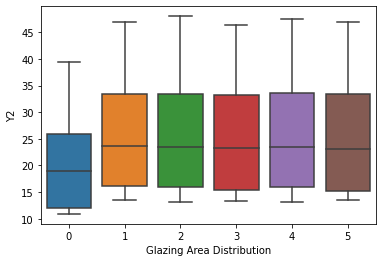

In [23]:
sns.boxplot(x="Glazing Area Distribution",y="Y2",data=df);

In [24]:
#Preprocessing

In [25]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

In [26]:
ss = StandardScaler()

In [27]:
x = df.drop(['Y1','Y2'],axis = 1)
x.head(5)

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [28]:
y = df[['Y1','Y2']]
y.head(5)

,Y1,Y2
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [30]:
print(f'Shape of x train set -> {x_train.shape}')

Shape of x train set -> (537, 8)


In [31]:
print(f'Shape of x test set -> {x_test.shape}')

Shape of x test set -> (231, 8)


In [32]:
print(f'Shape of y train set -> {y_train.shape}')

Shape of y train set -> (537, 2)


In [33]:
print(f'Shape of y test set -> {y_test.shape}')

Shape of y test set -> (231, 2)


In [34]:
x_train = ss.fit_transform(x_train)
x_train

array([[-1.34062531,  1.52415292,  1.12126375, ...,  0.45145363,
         0.10492788, -1.20196796],
       [-1.1495902 ,  1.24471621,  0.55906148, ...,  1.35604541,
        -1.01453443, -0.55391897],
       [ 1.33386615, -1.27021416, -0.00314079, ..., -0.45313816,
         0.10492788,  1.390228  ],
       ...,
       [-0.48096734,  0.40640609, -1.12754534, ...,  0.45145363,
        -1.01453443,  1.390228  ],
       [ 2.09800657, -1.82908757, -0.56534307, ...,  1.35604541,
         0.10492788,  0.74217901],
       [ 1.33386615, -1.27021416, -0.00314079, ...,  0.45145363,
        -1.01453443, -0.55391897]])

In [35]:
x_train = ss.fit_transform(x_train)
x_train

array([[-1.34062531,  1.52415292,  1.12126375, ...,  0.45145363,
         0.10492788, -1.20196796],
       [-1.1495902 ,  1.24471621,  0.55906148, ...,  1.35604541,
        -1.01453443, -0.55391897],
       [ 1.33386615, -1.27021416, -0.00314079, ..., -0.45313816,
         0.10492788,  1.390228  ],
       ...,
       [-0.48096734,  0.40640609, -1.12754534, ...,  0.45145363,
        -1.01453443,  1.390228  ],
       [ 2.09800657, -1.82908757, -0.56534307, ...,  1.35604541,
         0.10492788,  0.74217901],
       [ 1.33386615, -1.27021416, -0.00314079, ...,  0.45145363,
        -1.01453443, -0.55391897]])

In [36]:
#Predicting

In [38]:
from sklearn import metrics

In [59]:
#Predicting with Decision Tree Regressor

In [60]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=123)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [62]:
y_pred[:10]

array([[36.7 , 36.15],
       [36.26, 37.51],
       [36.7 , 36.15],
       [36.7 , 36.15],
       [36.7 , 36.15],
       [36.7 , 36.15],
       [36.7 , 36.15],
       [36.7 , 36.15],
       [36.26, 37.51],
       [36.7 , 36.15]])

In [82]:
print('RMSE ->', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE -> 9.770086378093007


In [66]:
#Model Tuning

In [67]:
from sklearn.model_selection import GridSearchCV

In [87]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [68]:
cart_model = DecisionTreeRegressor().fit(x_train,y_train)

In [69]:
cart_params = {"max_depth": [2,3,4,5,10,20],"min_samples_split":[2,10,5,50,100]}

In [70]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv=10).fit(x_train,y_train)

In [71]:
cart_cv_model.best_params_

{'max_depth': 5, 'min_samples_split': 5}

In [72]:
cart_model_tuned = DecisionTreeRegressor(max_depth=5,min_samples_split=5).fit(x_train,y_train)

In [76]:
y_pred_ = cart_model_tuned.predict(x_test)

In [86]:
print('RMSE ->',np.sqrt(metrics.mean_squared_error(y_test,y_pred_)))

RMSE -> 9.770086378093007
